# TensorFlow and Keras

In [ ]:
#Uncomment and use it
#!pip install tensorflow

In [1]:
import tensorflow as tf
%matplotlib inline  

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [2]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [3]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [6]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[4.6774335 5.089986 ]
 [6.685125  4.969785 ]
 [5.1979322 5.435087 ]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [7]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [11]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

AttributeError: 'ResourceVariable' object has no attribute 'random'

In [10]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

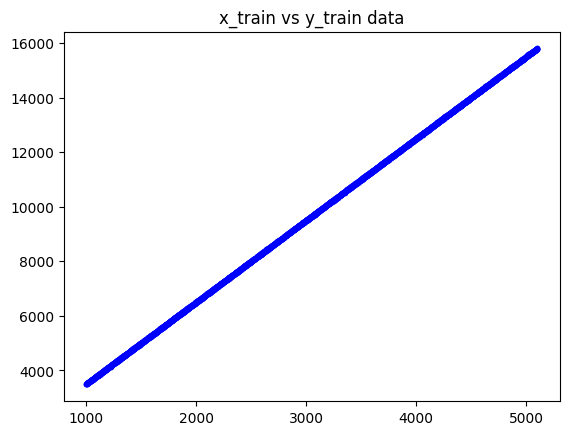

In [24]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [26]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.00000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  91530600.0,  W : [[0.84372824]], b  [1.0001796]
epoch : 1, loss  56558920.0,  W : [[1.3356009]], b  [1.0003211]
epoch : 2, loss  34953860.0,  W : [[1.7222099]], b  [1.0004326]
epoch : 3, loss  21606542.0,  W : [[2.0260825]], b  [1.0005205]
epoch : 4, loss  13360734.0,  W : [[2.2649245]], b  [1.0005898]
epoch : 5, loss  8266585.0,  W : [[2.452653]], b  [1.0006447]
epoch : 6, loss  5119486.5,  W : [[2.6002064]], b  [1.0006881]
epoch : 7, loss  3175249.75,  W : [[2.7161827]], b  [1.0007224]
epoch : 8, loss  1974123.625,  W : [[2.8073394]], b  [1.0007497]
epoch : 9, loss  1232083.0,  W : [[2.878988]], b  [1.0007714]
epoch : 10, loss  773661.0,  W : [[2.9353034]], b  [1.0007888]
epoch : 11, loss  490453.34375,  W : [[2.979567]], b  [1.0008028]
epoch : 12, loss  315491.4375,  W : [[3.014358]], b  [1.000814]
epoch : 13, loss  207402.0625,  W : [[3.0417035]], b  [1.000823]
epoch : 14, loss  140626.078125,  W : [[3.063197]], b  [1.0008304]
epoch : 15, loss  99372.5625,  W : [[3

Final Weights

In [25]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0987737]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0005686], dtype=float32)>


Plotting

epoch is: 0, loss is 88371608.0,  W is: [[0.3303445]], b is [1.0000176]


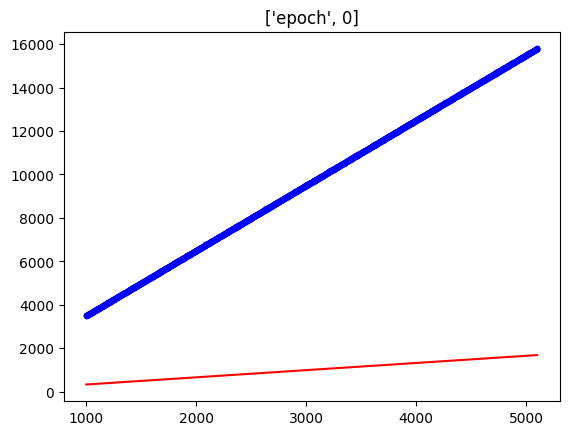

epoch is: 30, loss is 24156710.0,  W is: [[1.6727642]], b is [1.0004041]


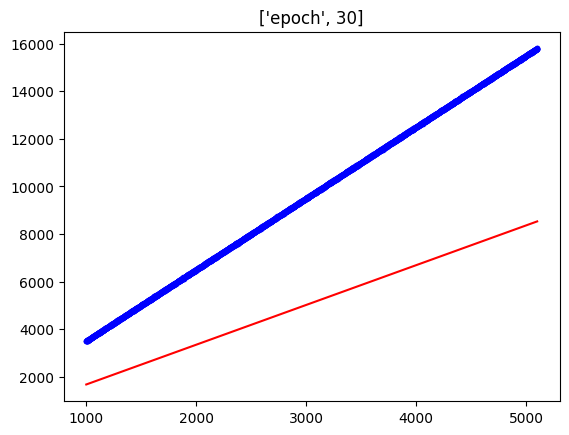

epoch is: 60, loss is 6620594.5,  W is: [[2.3742795]], b is [1.0006081]


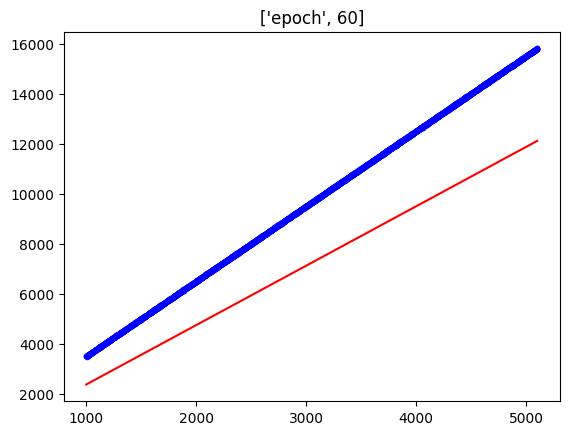

epoch is: 90, loss is 1831750.125,  W is: [[2.7408736]], b is [1.0007164]


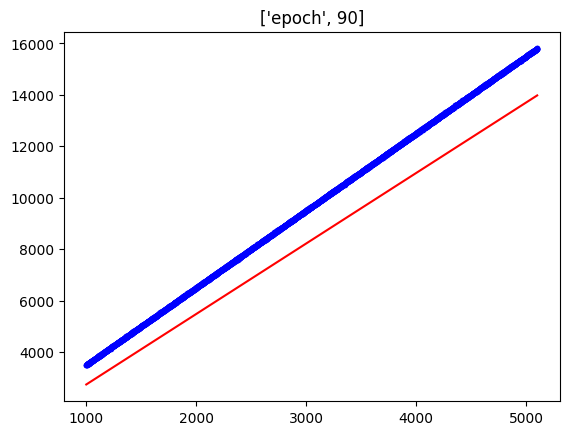

epoch is: 120, loss is 523986.90625,  W is: [[2.932447]], b is [1.0007751]


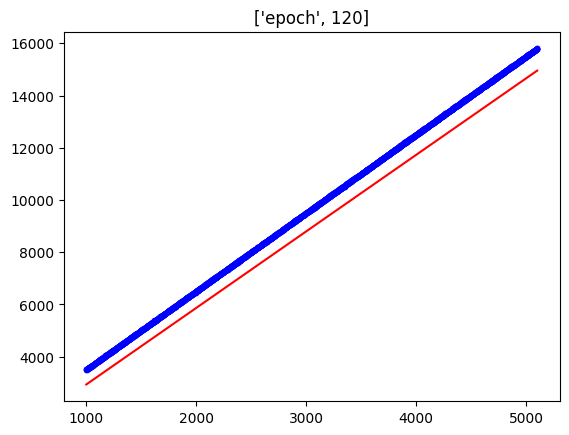

epoch is: 150, loss is 166858.859375,  W is: [[3.032558]], b is [1.0008076]


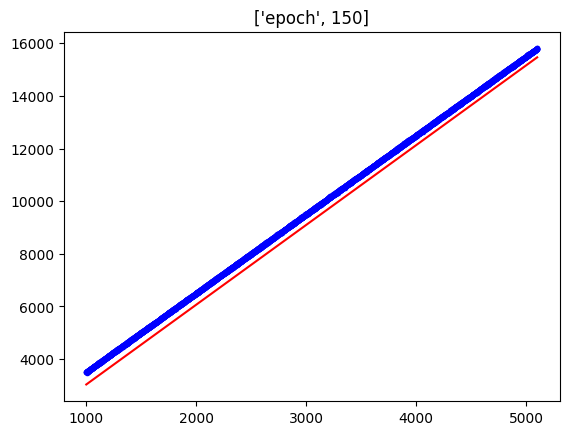

epoch is: 180, loss is 69331.6796875,  W is: [[3.0848737]], b is [1.0008265]


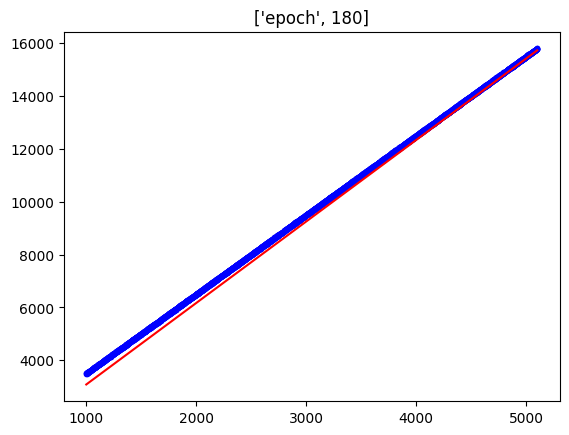

In [27]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

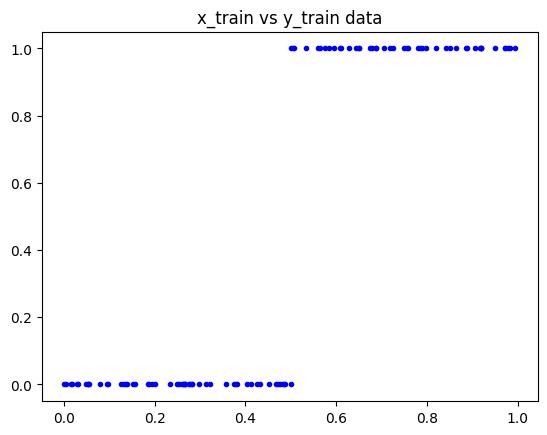

In [28]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [29]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  23.45511245727539,  W : [[0.72377706]], b  [-0.41161314]
epoch : 1, loss  20.657724380493164,  W : [[1.2134131]], b  [-0.5195919]
epoch : 2, loss  18.412151336669922,  W : [[1.5524619]], b  [-0.8093574]
epoch : 3, loss  16.616535186767578,  W : [[1.9366667]], b  [-0.91262925]
epoch : 4, loss  15.174544334411621,  W : [[2.2168374]], b  [-1.1325625]
epoch : 5, loss  14.00631046295166,  W : [[2.522183]], b  [-1.2299492]
epoch : 6, loss  13.048934936523438,  W : [[2.7606466]], b  [-1.3954248]
epoch : 7, loss  12.25442123413086,  W : [[3.0071979]], b  [-1.4919639]
epoch : 8, loss  11.586697578430176,  W : [[3.2156765]], b  [-1.6175002]
epoch : 9, loss  11.018566131591797,  W : [[3.4204886]], b  [-1.7111837]
epoch : 10, loss  10.529572486877441,  W : [[3.604698]], b  [-1.8113835]
epoch : 11, loss  10.104255676269531,  W : [[3.7806287]], b  [-1.8983461]
epoch : 12, loss  9.73082160949707,  W : [[3.9443352]], b  [-1.9833969]
epoch : 13, loss  9.400169372558594,  W : [[4.099588

Plotting

In [ ]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [31]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step
(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


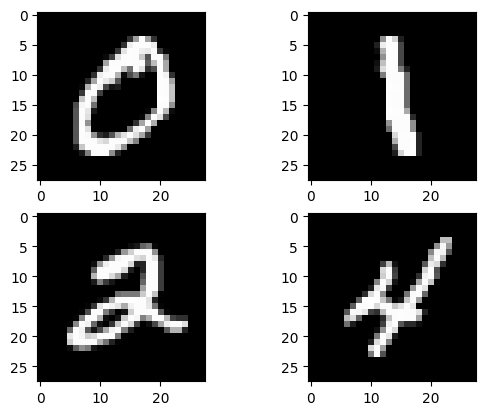

In [39]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [53]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(300, activation='sigmoid')) #, input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(150, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8086 - loss: 0.6783
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9436 - loss: 0.1864
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9614 - loss: 0.1274
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9718 - loss: 0.0940
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0698
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0575
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9857 - loss: 0.0474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0392
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0299
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0238


In [51]:
print(model.get_weights())

[array([[ 0.02319387, -0.07618519, -0.08496498, ..., -0.03395448,
         0.08021011, -0.03864358],
       [-0.07183942, -0.0486702 ,  0.06497807, ...,  0.00134471,
         0.07270402, -0.00043109],
       [ 0.07886512,  0.0026481 ,  0.07715138, ...,  0.04139591,
         0.0176485 ,  0.00066848],
       ...,
       [ 0.08185864, -0.01217218, -0.04070569, ..., -0.03705097,
        -0.02781238, -0.02723495],
       [ 0.06503469, -0.03518603,  0.00933503, ...,  0.07957516,
         0.06210091, -0.08281431],
       [-0.00662638,  0.03594214, -0.0501243 , ...,  0.07458571,
         0.02462418, -0.00391103]], dtype=float32), array([ 1.0941567 ,  0.2039311 , -1.0194799 ,  0.3569552 ,  0.09132231,
        0.8612602 , -1.0148566 , -1.0639745 , -0.4961205 , -0.17563032],
      dtype=float32), array([[ 0.26082513,  1.1829098 ,  0.14583975, -1.777102  , -2.058988  ,
         1.9648339 ,  1.3946606 , -4.5218034 , -3.0612082 , -3.7943802 ],
       [ 1.1988243 ,  2.545538  ,  0.03752028,  0.168589

In [55]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0821
Test Accuracy: 97.78%
